In [2]:
import numpy as np

import matplotlib.pyplot as plt


In [3]:
X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

In [4]:
##normalizing the eqauation
##using inv to calculate the inverse form the np.linalg and using dot to multipy
X_b=np.c_[np.ones((100,1)),X]# add x0= 1 to each instance
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
#using y=4+3x+gaussian noise 
# lets see what the equation found 

theta_best

array([[4.04853894],
       [2.89966303]])

In [6]:
#now we make predictions using theta

X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new]

y_predict=X_new_b.dot(theta_best)
y_predict

array([[4.04853894],
       [9.84786501]])

In [7]:
#plotting the model predictions 

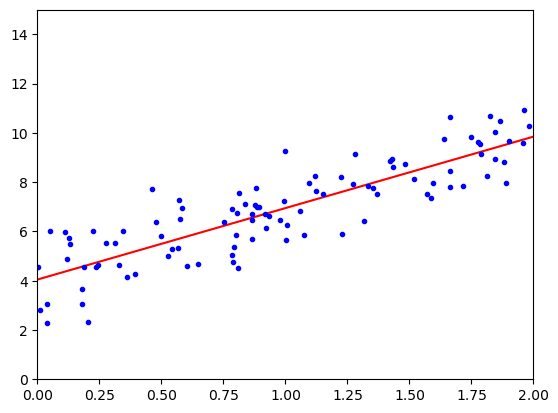

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

## performing  linear regression 

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_


(array([4.04853894]), array([[2.89966303]]))

In [10]:
lin_reg.predict(X_new)

array([[4.04853894],
       [9.84786501]])

## implementation of calculating step for gradient descent

In [11]:
eta=0.1
n_iterations=1000
m=100
theta=np.random.randn(2,1)

In [12]:
for iteration in range(n_iterations):
    gradients=2/m* X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-eta*gradients

In [13]:
theta

array([[4.04853894],
       [2.89966303]])

## implementing Stochastic gradient descent using simple learning schedule

In [14]:
n_epochs=50
t0,t1=5,50

def learning_schedule(t):
    return t0/(t+t1)


theta= np.random.randn(2,1)



In [15]:
for epoch in range(n_epochs):
        for i in range(m):
                random_index=np.random.randint(m)
                xi=X_b[random_index:random_index+1]
                yi=y[random_index:random_index+1]
                gradients=2*xi.T.dot(xi.dot(theta)-yi)
                eta=learning_schedule(epoch*m+i)
                theta=theta-eta*gradients

                

In [16]:
theta

array([[4.00913127],
       [2.93881293]])

**by convention we iterate the rounds of m iterations , each round is called epoch**

while batch gradient decsent goes through 1000 iterations , this only goes through 50 to produce a good result 

## linear regression using Stochastic GD using scikit-learn

In [17]:
from sklearn.linear_model import SGDRegressor
sdg_reg=SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1)
sdg_reg.fit(X,y.ravel())

,loss,'squared_error'
,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [18]:
sdg_reg.intercept_,sdg_reg.coef_


(array([3.98706096]), array([2.83075783]))

## polynomial regression 



In [19]:
m=100
X=6*np.random.rand(m,1)-3
y=0.5* X**2 +X+2+np.random.randn(m,1)



In [20]:
#the above data will never fit a straight line so we will now use polynomial regression to
# transfrom the data adding square (second degree polynomial) of each feature in the training set as  a new feature




In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X)
X[0]

array([1.78467227])

In [22]:
X_poly[0]

array([1.78467227, 3.18505512])

now X_poly contains the original features of X plus the square of this feature, now we can fit a linear regression model to this extended training set 

In [23]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.74394262]), array([[0.9063744 , 0.52874726]]))

## learning curves 


In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [25]:
def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val =train_test_split(X,y,test_size=0.2)
    train_errors,val_errors=[],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict=model.predict(X_train[:m])
        y_val_predict=model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors),"r--",linewidth=2,label="train")
    plt.plot(np.sqrt(val_errors),"b--",linewidth=3,label="val")

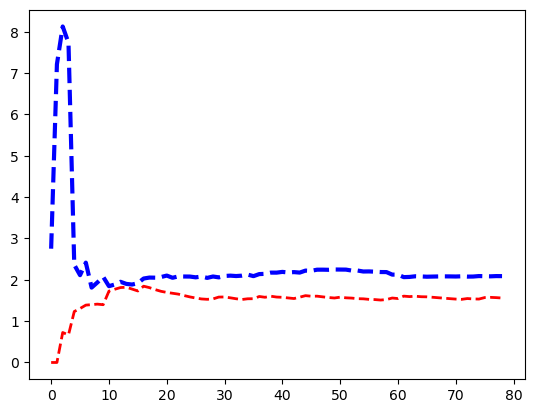

In [26]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
plot_learning_curves(lin_reg,X,y)

## ridge regression with scikit-learn


In [27]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=1,solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])


array([4.60734229])

In [28]:
sdg_reg=SGDRegressor(penalty="l2")
sdg_reg.fit(X,y.ravel())
sdg_reg.predict([[1.5]])

array([4.59030243])

## lasso regression


In [29]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.56085688])

## Elastic net


In [30]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.56660419])

## early stopping 